In [2]:
import glob
dataset = "SENSE"
exp = "05-13_23-59_vgg_con10_SENSE_5e-05_0.0001"
device = ""
gpu = 2
backbone = ""

if device == "TWCC":
    gpu = 0

    root = "/home/leohuang0511"
else:
    root = "/nfs/home/leo0511/Research"
files = sorted(glob.glob(f"{root}/DutyMOFA/exp/{dataset}/{exp}/ep*"))
for file in files:
    print(f"python test_{dataset}.py --MODEL_PATH {file} --GPU_ID {gpu} ")

python test_SENSE.py --MODEL_PATH /nfs/home/leo0511/Research/DutyMOFA/exp/SENSE/05-13_23-59_vgg_con10_SENSE_5e-05_0.0001/ep_10_iter_144000_mae_4.142_mse_8.464_seq_MAE_7.316_seq_MSE_11.130_WRAE_15.395_MIAE_1.408_MOAE_1.463.pth --GPU_ID 2 
python test_SENSE.py --MODEL_PATH /nfs/home/leo0511/Research/DutyMOFA/exp/SENSE/05-13_23-59_vgg_con10_SENSE_5e-05_0.0001/ep_11_iter_168000_mae_4.542_mse_9.695_seq_MAE_7.938_seq_MSE_10.699_WRAE_16.843_MIAE_1.425_MOAE_1.431.pth --GPU_ID 2 
python test_SENSE.py --MODEL_PATH /nfs/home/leo0511/Research/DutyMOFA/exp/SENSE/05-13_23-59_vgg_con10_SENSE_5e-05_0.0001/ep_1_iter_10000_mae_4.550_mse_6.954_seq_MAE_10.764_seq_MSE_15.259_WRAE_21.229_MIAE_1.512_MOAE_1.731.pth --GPU_ID 2 
python test_SENSE.py --MODEL_PATH /nfs/home/leo0511/Research/DutyMOFA/exp/SENSE/05-13_23-59_vgg_con10_SENSE_5e-05_0.0001/ep_1_iter_12000_mae_3.026_mse_5.364_seq_MAE_12.728_seq_MSE_17.756_WRAE_23.569_MIAE_1.551_MOAE_1.769.pth --GPU_ID 2 
python test_SENSE.py --MODEL_PATH /nfs/home/leo051

In [1]:
import torch
import argparse
from importlib import import_module


parser = argparse.ArgumentParser()
parser.add_argument('--EXP_NAME', type=str, default='')

parser.add_argument('--RESUME_PATH',type=str, default='')
parser.add_argument('--PRETRAIN_PATH',type=str, default='')
parser.add_argument('--FROZEN', default=False, action='store_true', help="frozen pretrained frontend weights")


parser.add_argument('--GPU_ID', type=str, default='0')
parser.add_argument('--SEED', type=int, default=3035)
parser.add_argument('--DATASET', type=str, default='HT21')
parser.add_argument('--TASK', type=str, default='FT')
parser.add_argument('--PRINT_FREQ', type=int, default=20)
parser.add_argument('--SAVE_VIS_FREQ', type=int, default=500)
parser.add_argument('--BACKBONE', type=str, default='vgg')


parser.add_argument('--LR_MIN', type=float, default=1e-6)
parser.add_argument('--LR_BASE', type=float, default=5e-5, help='density branch')
parser.add_argument('--LR_THRE', type=float, default=1e-4, help='mask branch')
parser.add_argument('--LR_DECAY', type=float, default=0.95)
parser.add_argument('--WEIGHT_DECAY', type=float, default=1e-5)
parser.add_argument('--WARMUP_EPOCH', type=int, default=3, help='number of epochs for warm up step in cosine annealing lr scheduler')
parser.add_argument('--MAX_EPOCH', type=int, default=20)
parser.add_argument('--WORKER', type=int, default=4)


parser.add_argument('--CON_WEIGHT', type=float, default=0.5)
parser.add_argument('--SCALE_WEIGHT', type=float, nargs='+', default=[2,0.1,0.01])
parser.add_argument('--CNT_WEIGHT', type=float, default=10)
parser.add_argument('--MASK_WEIGHT', type=float, default=1)
parser.add_argument('--IO_WEIGHT', type=float, default=1)




#_test or val
parser.add_argument('--VAL_FREQ', type=int, default=1000)
parser.add_argument('--VAL_START', type=int, default=1)
parser.add_argument('--VAL_BATCH_SIZE', type=int, default=1)



#_train
parser.add_argument('--TRAIN_SIZE', type=int, nargs='+', default=[768,1024])
parser.add_argument('--TRAIN_FRAME_INTERVALS', type=int, nargs='+', default=[40, 85])
parser.add_argument('--TRAIN_BATCH_SIZE', type=int, default=2)
parser.add_argument('--ROI_RADIUS', type=float, default=4.)
parser.add_argument('--FEATURE_SCALE', type=float, default=1/4.)
parser.add_argument('--GAUSSIAN_SIGMA', type=float, default=4)
parser.add_argument('--CONF_BLOCK_SIZE', type=int, default=16)




#_shift pretrain
parser.add_argument('--WIN_OFFSET_RANGE', type=int, nargs='+', default=[100,350])
parser.add_argument('--IMG_OFFSET_RANGE', type=int, nargs='+', default=[-100,100])


parser.add_argument('--DEN_FACTOR', type=float, default=200.)
parser.add_argument('--MEAN_STD', type=tuple, default=([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]))

# cfg = parser.parse_args()
cfg = parser.parse_known_args()[0]


# data_mode = cfg.DATASET
# datasetting = import_module(f'datasets.setting.{data_mode}')
# cfg_data = datasetting.cfg_data
cfg_data = cfg



In [10]:
import sys
sys.path.append('..')
from model.SMDCA import  SMDCANet

model = SMDCANet(cfg, cfg_data).Extractor.scale_loc_head
total = sum([param.nelement() for param in model.parameters()])
print("Number of parameter: %.2fM" % (total/1e6))

Number of parameter: 0.16M


In [5]:
import sys
sys.path.append('../../../')

from FMDC.model.video_crowd_count import  video_crowd_count
sys.path.append('./FMDC')


model = video_crowd_count(cfg, cfg_data)
total = sum([param.nelement() for param in model.parameters()])
print("Number of parameter: %.2fM" % (total/1e6))

ModuleNotFoundError: No module named 'misc'

In [8]:
import thop
from thop import profile 
input = torch.randn(4, 3, 768, 1024)
flops, params = profile(model, inputs=(input,))
print(flops)
print(params)

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.ConvTranspose2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.instancenorm.InstanceNorm2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.normalization.LayerNorm'>.


TypeError: video_crowd_count.forward() missing 2 required positional arguments: 'img_rgb' and 'target'

In [24]:
from torchvision import models
import torch.nn as nn

swin = models.swin_b(weights='Swin_B_Weights.IMAGENET1K_V1')
features = list(swin.features.children())
layer1 = nn.Sequential(*features[0:2])
layer2 = nn.Sequential(*features[2:4])
layer3 = nn.Sequential(*features[4:6])


In [26]:
import torch

x  = torch.zeros((4,3,768,1024))
x = layer1(x)
print(x.shape)
x = layer2(x)
print(x.shape)
x = layer3(x)
print(x.shape)

torch.Size([4, 192, 256, 128])
torch.Size([4, 96, 128, 256])
torch.Size([4, 48, 64, 512])


In [19]:
len(features)

8

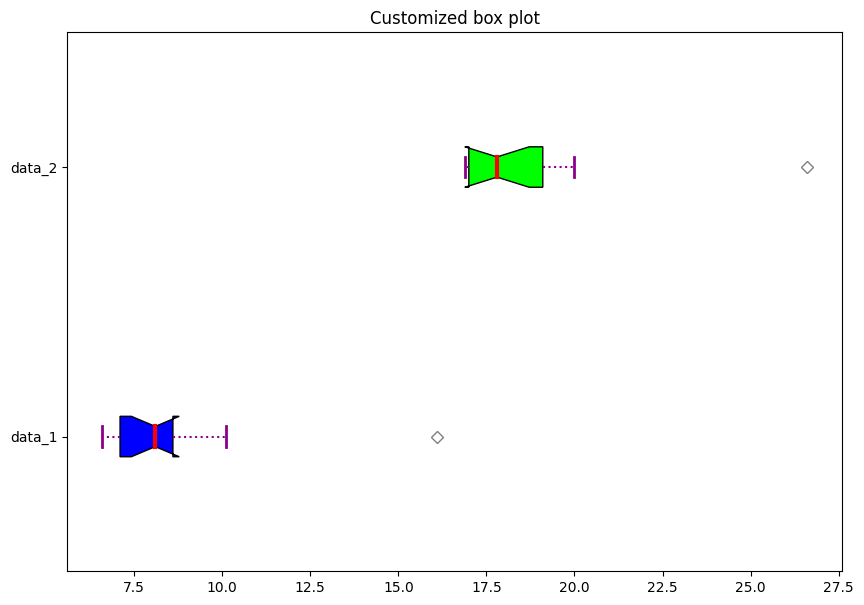

In [15]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
np.random.seed(10)
data_1 = np.array([16.1,10.1,7.9,6.6,6.6,7.1,7.1,8.4,8.0,8.6,8.2,8.6])
data_2 = np.array([26.6,20.0,18.3,16.9,17.7,17.0,16.9,17.0,18.5,17.8,19.3,17.8,19.1])

data = [data_1, data_2]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)
	
# x-axis labels
ax.set_yticklabels(['data_1', 'data_2'])

# Adding title 
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()


/tmp/ipykernel_258610/3645038855.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['data_1', 'data_2'])


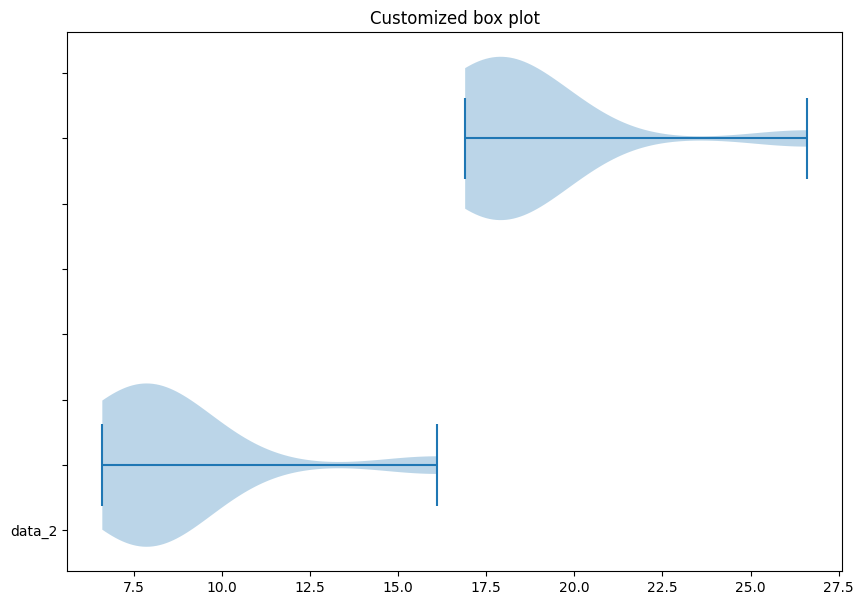

In [16]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.violinplot(data, vert=0)

ax.set_yticklabels(['data_1', 'data_2'])

# Adding title 
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

In [6]:
import pandas as pd
from tensorboard.backend.event_processing import event_accumulator

def scale_to_array(path, key_name):
 
    #加载日志数据
    list = []
    ea=event_accumulator.EventAccumulator(path) 
    ea.Reload()
    print(ea.scalars.Keys())
    
    val_psnr=ea.scalars.Items(key_name)
    print(len(val_psnr))
    for i in val_psnr:
        list.append([i.step,i.value]) 
    return list
        
lam = scale_to_array('/nfs/home/leo0511/Research/DutyMOFA/exp/SENSE/02-21_14-18_vgg__SENSE_5e-05_0.0001', 'dynamic_weight')
scale = scale_to_array('/nfs/home/leo0511/Research/DutyMOFA/exp/SENSE/02-21_14-18_vgg__SENSE_5e-05_0.0001', 'loss_den')


['loss_den_overall', 'loss_den', 'loss_mask', 'loss_in', 'loss_out', 'loss_con', 'dynamic_weight', 'base_lr', 'thre_lr', 'mae', 'mse', 'seqMAE', 'seqMSE', 'WRAE', 'MIAE', 'MOAE']
10000
['loss_den_overall', 'loss_den', 'loss_mask', 'loss_in', 'loss_out', 'loss_con', 'dynamic_weight', 'base_lr', 'thre_lr', 'mae', 'mse', 'seqMAE', 'seqMSE', 'WRAE', 'MIAE', 'MOAE']
10000


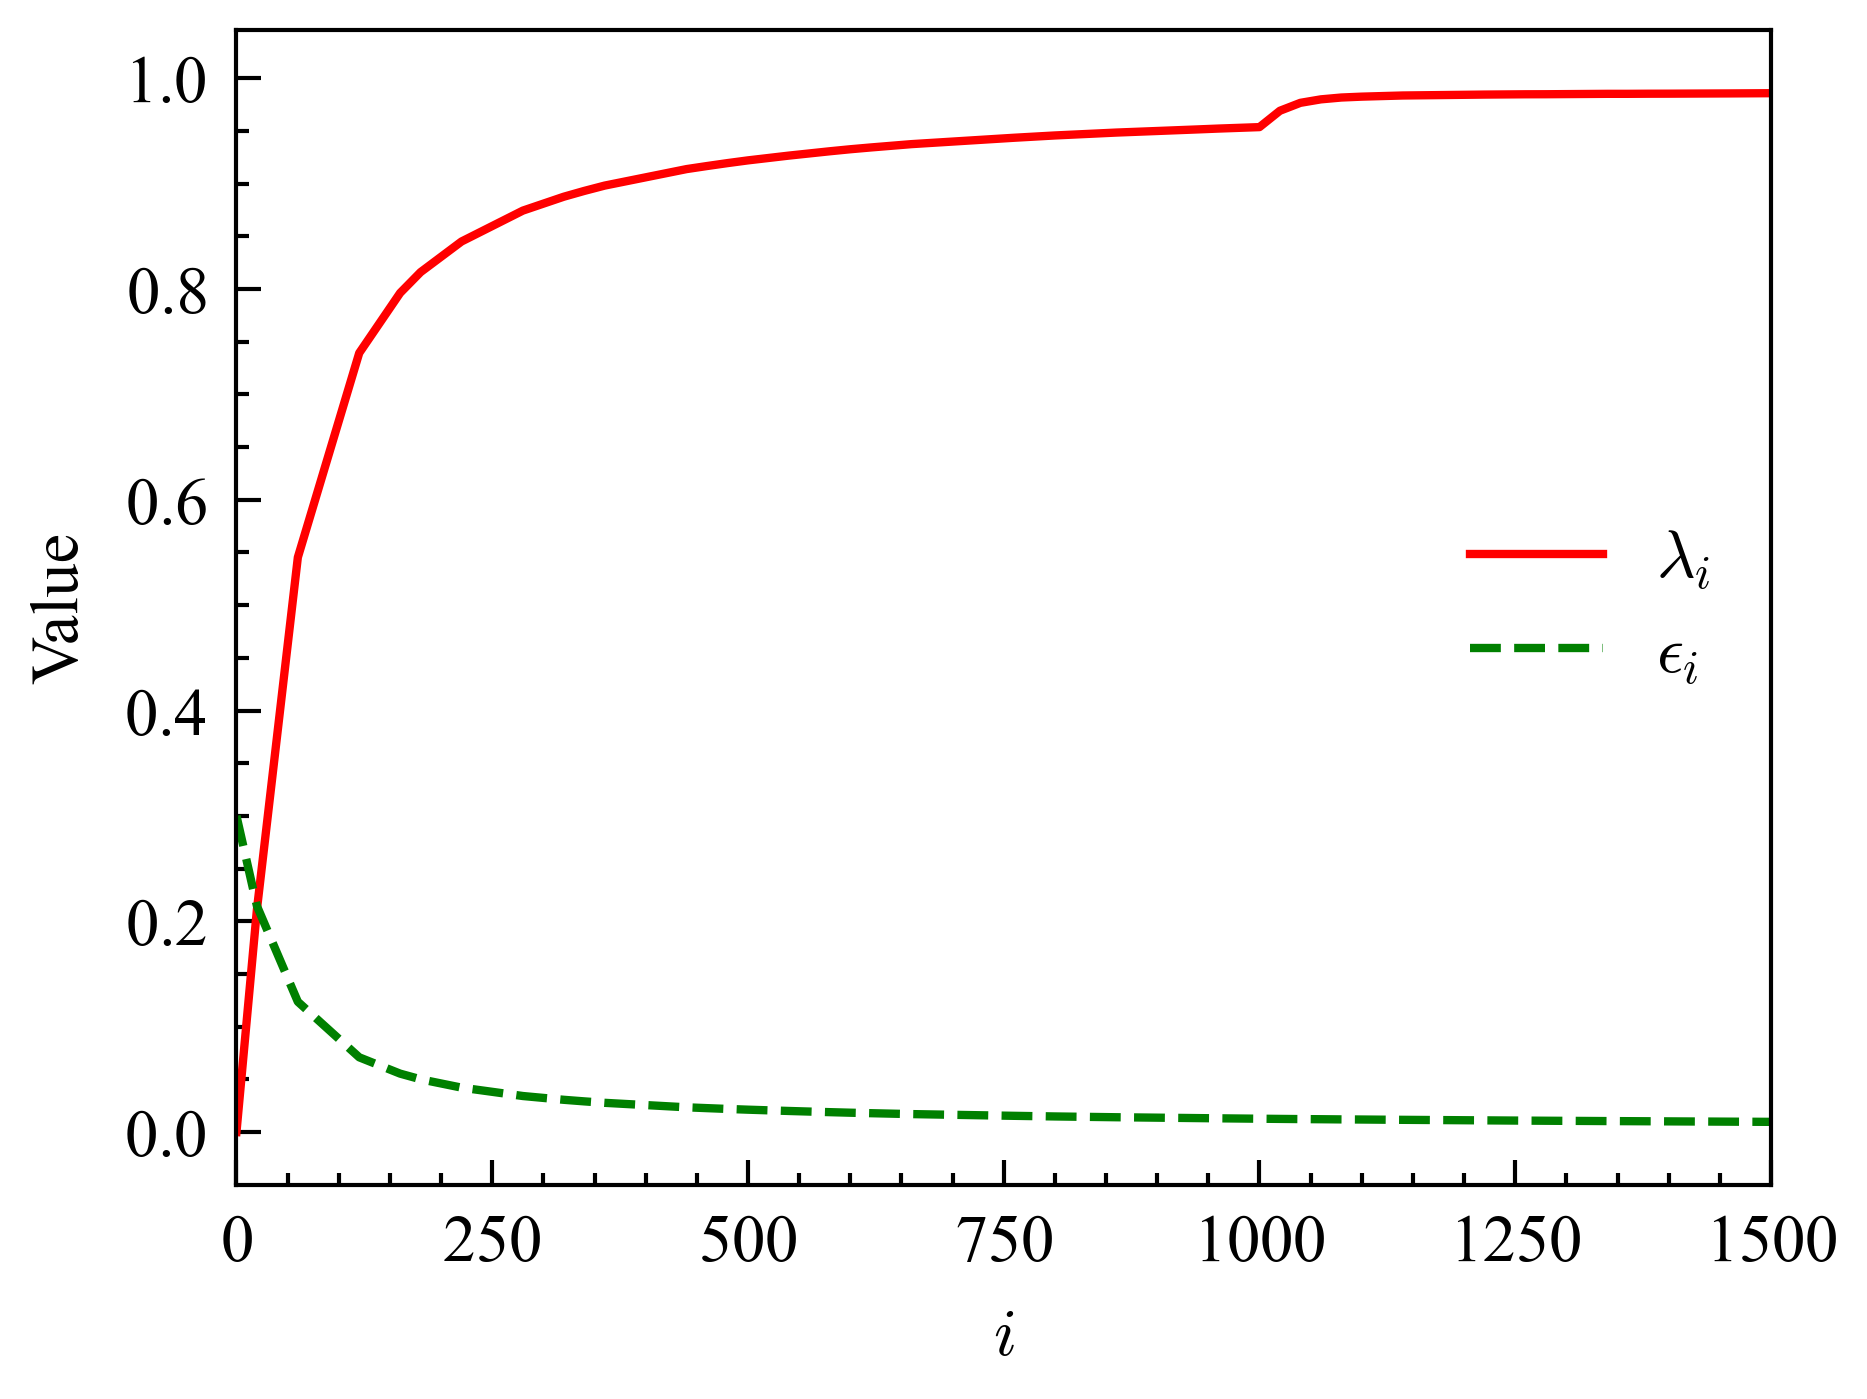

In [8]:
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np

import scienceplots
import matplotlib.font_manager as font_manager


plt.style.use(['science', 'no-latex', 'ieee'])
lam = np.array(lam)
scale = np.array(scale)
lam = np.insert(lam,0,[0,0],0)
scale = np.insert(scale,0,[0,0.3],0)

# font = font_manager.FontProperties(;family'='Times New Roman')
plt.rc('font', family='Times New Roman')
# Example: plot cos(x), sin(x), and sinc(x) in the same figure
# plt.xscale('log')
plt.xlim([0,1500])

plt.xlabel('Iteration ($i$)')
plt.ylabel('Value')

plt.plot(lam[:,0], lam[:,1], 'red')   # black dashed line, with "+" markers
plt.plot(scale[:,0], scale[:,1], 'green')     # green dimonds (no line)
plt.legend(['$\lambda_i$','$\epsilon_i$'],prop={'family':'Times New Roman'})
plt.savefig('../ECCV_SOFA-lambfa.pdf')
plt.show()

In [72]:
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np

import scienceplots
import matplotlib.font_manager as font_manager


plt.style.use(['science', 'no-latex', 'ieee'])
hyper = 'omega_1'
mae = np.array([8.6,
8.9,
8.6,
7.8,
7.2,
6.6])
mse = np.array([18.5,
20.5,
16.9,
12.8,
14.1,
11.5])
wrae = np.array([13.1,
12.7,
12.7,
14,
12,
11])
xticks = [1,
2,
4,
6,
8,
10]
gap=1

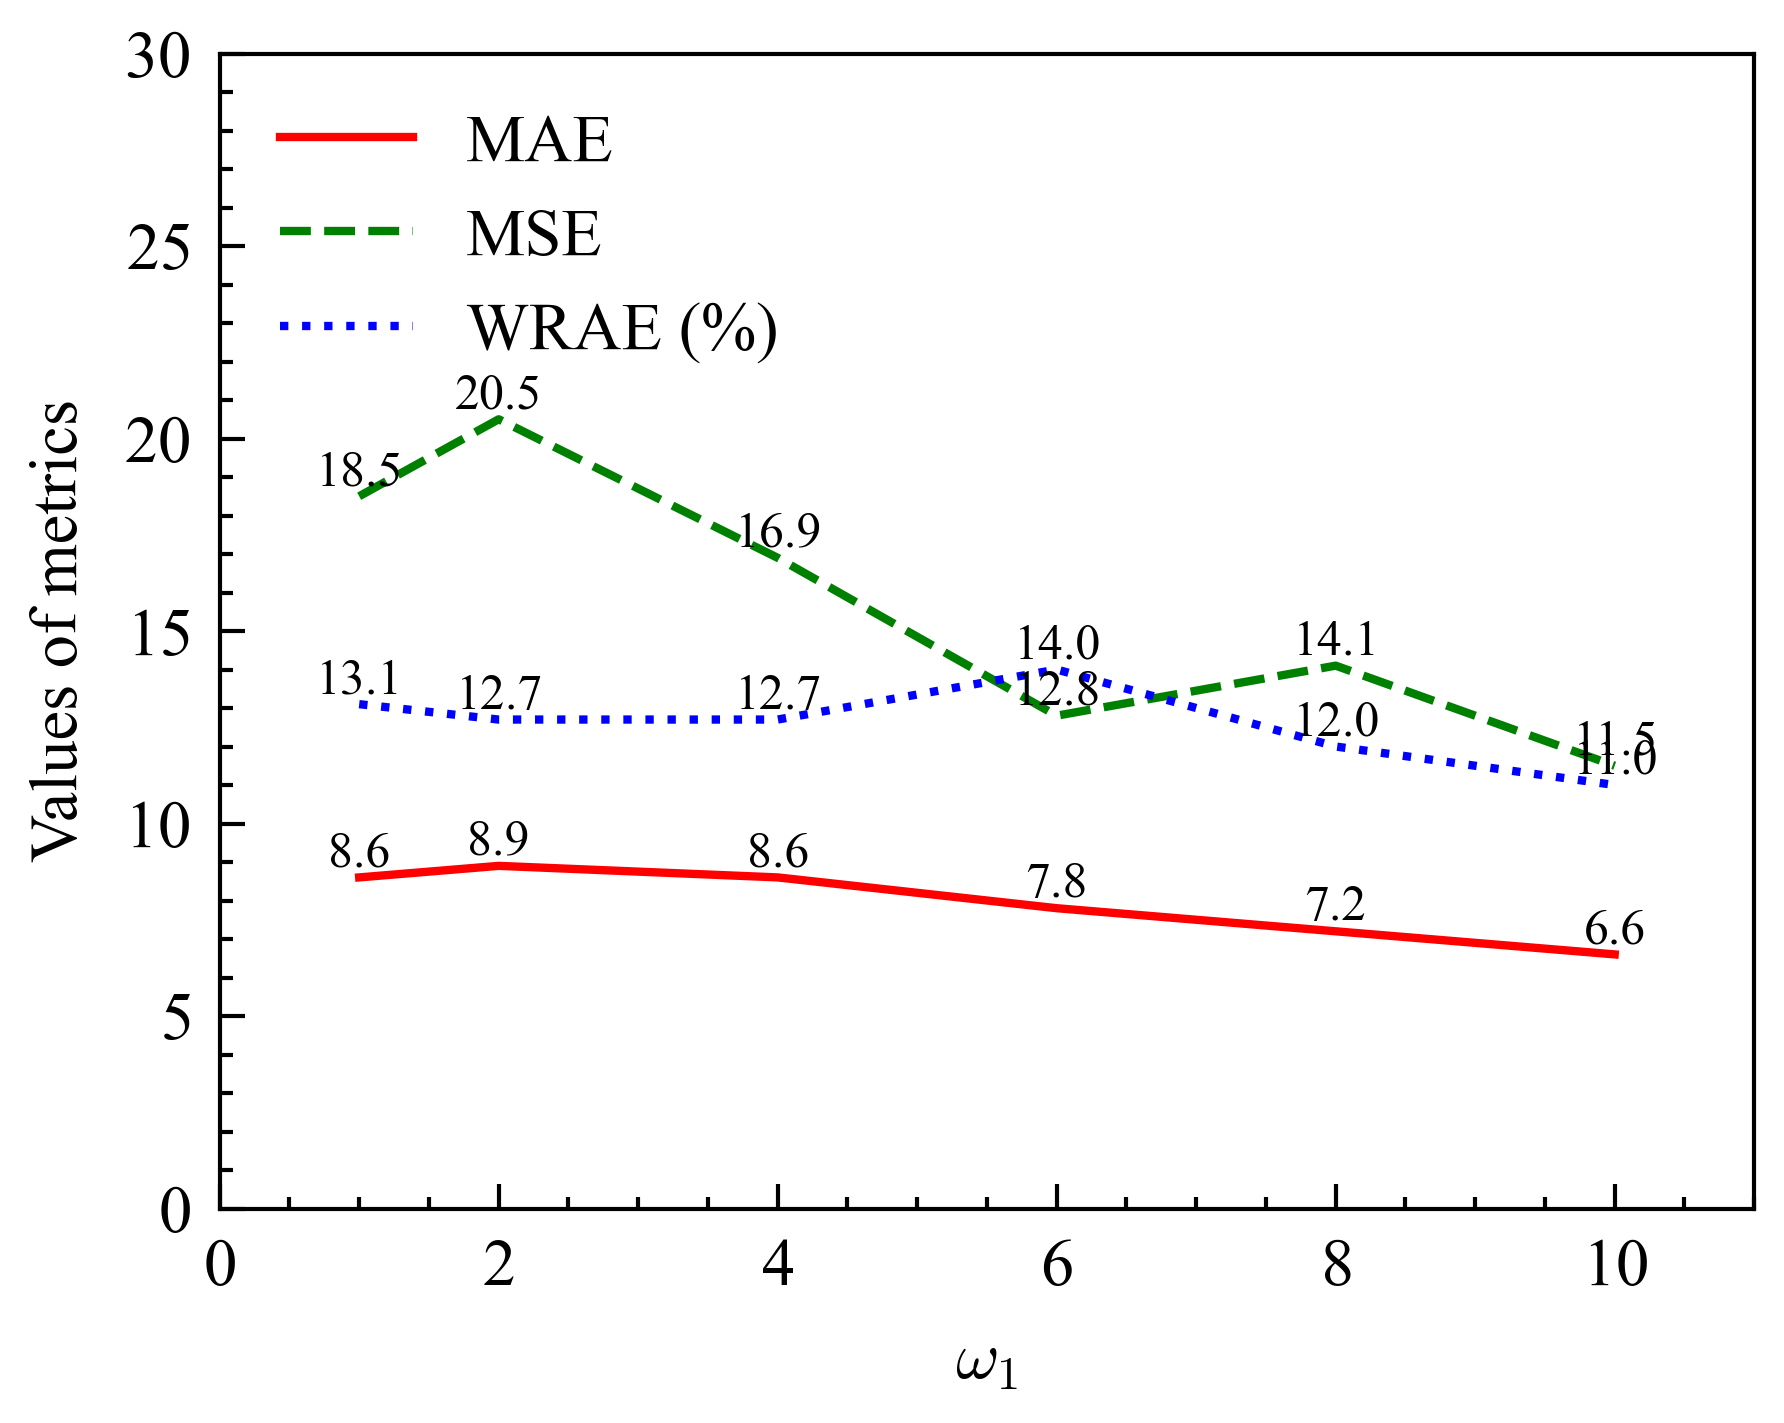

In [74]:

# plt.xticks([xticks])


# font = font_manager.FontProperties(;family'='Times New Roman')
plt.rc('font', family='Times New Roman')
# Example: plot cos(x), sin(x), and sinc(x) in the same figure
# plt.xscale('log')

plt.ylabel('Values of metrics')

for a,b,c,d in zip(mae, mse, wrae,xticks):
    plt.text(d,a,a,ha='center',va='bottom',fontsize=6)
    plt.text(d,b,b,ha='center',va='bottom',fontsize=6)
    plt.text(d,c,c,ha='center',va='bottom',fontsize=6)

plt.ylim([0,30])
plt.xlim([0,xticks[-1]+gap])

plt.plot(xticks, mae, 'red')   # black dashed line, with "+" markers
plt.plot(xticks, mse, 'green')   
plt.plot(xticks, wrae, 'blue')     # green dimonds (no line)
  # green dimonds (no line)
plt.legend(['MAE','MSE', 'WRAE (%)'],prop={'family':'Times New Roman'},loc='upper left')
plt.xlabel(f'$\\{hyper}$')
plt.savefig('../ECCV_SOFA-'+hyper+'.pdf')
plt.show()

In [6]:
import torch

path = "/nfs/home/leo0511/Research/DutyMOFA/src/pretrained/carla_ep_14_iter_22000_mae_7.288_mse_8.240_seq_MAE_24.390_seq_MSE_24.390_WRAE_10.697_MIAE_2.812_MOAE_2.347.pth"

model_dict = torch.load(path)
new_model_dict = {}

dict=[]

for k, v in model_dict.items():
    new_key = k.replace("DutyMOFA", "SOFA")
    new_key = k.replace("confidence_predict_layer","ASAM")
    new_model_dict[new_key]= v

torch.save(new_model_dict,"../pretrained/CARLA.pth")